# Importing the libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the dataset

In [2]:
dataset = pd.read_csv('../data/transfusion.data')

In [3]:
dataset.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
dataset.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# EDA - Exploratory Data Analysis

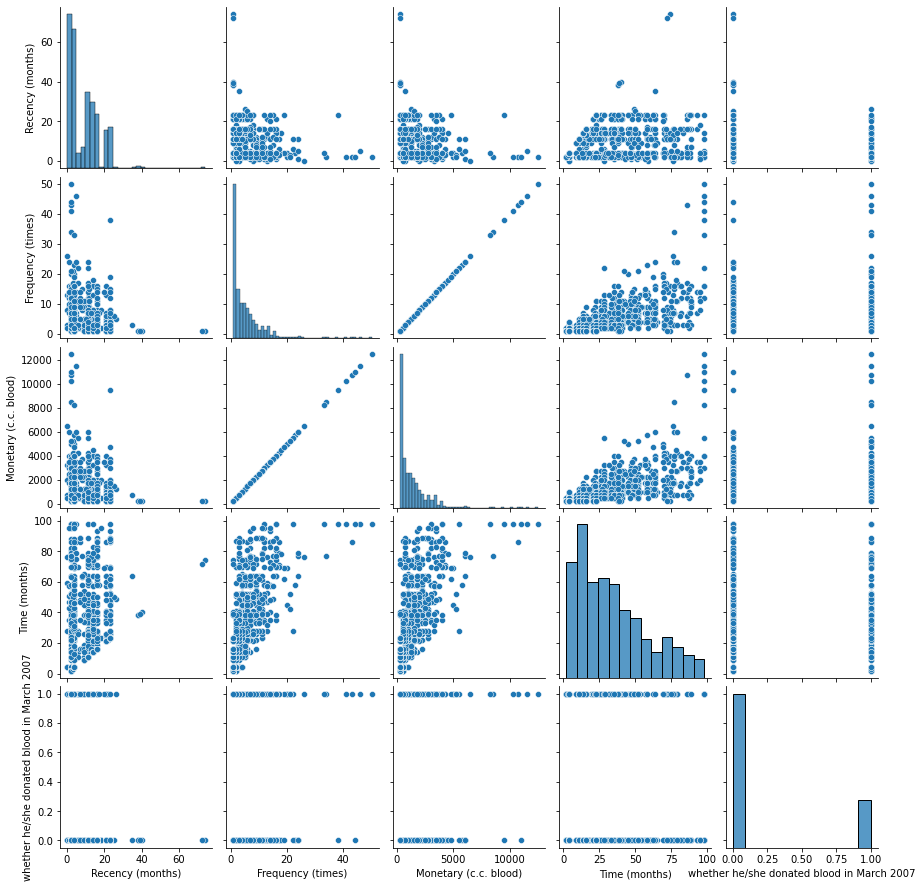

In [7]:
sns.pairplot(dataset)

In [8]:
dataset.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

<AxesSubplot:>

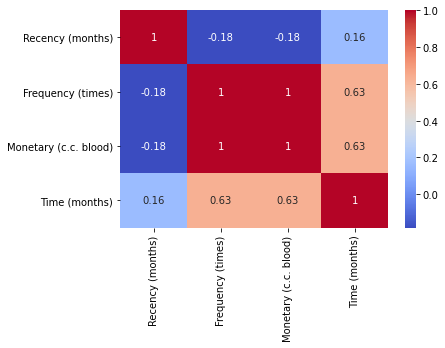

In [11]:
sns.heatmap(dataset.drop('whether he/she donated blood in March 2007', axis=1).corr(), cmap='coolwarm', annot=True)

# Multicolinearity Issue 

**Perfect correlation between Frequency (times) and Monetary (c.c. blood))**
<br>
Choosing to remove the Monetary (c.c. blood)

In [12]:
dataset.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [13]:
X = dataset.drop(['Monetary (c.c. blood)', 'whether he/she donated blood in March 2007'], axis=1)
y = dataset['whether he/she donated blood in March 2007']

# Splitting the dataset into training and test set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=248, random_state=0)

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc_X = StandardScaler()

In [23]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Building the Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifier = LogisticRegression()

In [26]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = classifier.predict(X_test)

# Model Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss

In [29]:
print(confusion_matrix(y_test, y_pred))

[[179   2]
 [ 60   7]]


In [30]:
print(accuracy_score(y_test, y_pred))

0.75


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       181
           1       0.78      0.10      0.18        67

    accuracy                           0.75       248
   macro avg       0.76      0.55      0.52       248
weighted avg       0.76      0.75      0.67       248



In [34]:
print(log_loss(y_test, y_pred))

8.634700547094043


In [35]:
dataset.head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [39]:
X.iloc[213]

Recency (months)     4
Frequency (times)    1
Time (months)        4
Name: 213, dtype: int64

In [37]:
y.iloc[213]

0

In [41]:
print(classifier.predict(sc_X.transform([[4,1,4]])))

[0]
